### UCLA EC ENGR 219: Large Scale Data Mining Models and Algorithms - Project #1

## Problem 1

QUESTION 1: To get started, plot a histogram of the number of training documents for each
of the 20 categories to check if they are evenly distributed.

## Problem 2

In [1]:
# Have to pip3 install <packages> on local machine before import.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# Downloads and loads training set data ~/scikit_learn_data/20news_home
newsgroups_train = fetch_20newsgroups(subset='train')

# .shape() prints the size/dimensions of the array
newsgroups_train.filenames.shape

# .target is the integer; corresponds to a news-category
# { 0:'alt.atheism', 1:'comp.graphics' ... 19:'talk.religion.misc'}
category_dict = dict(zip(range(20),list(newsgroups_train.target_names)))

# Print Histogram
data = np.array(newsgroups_train.target)

# Center data around integers
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
bins = np.arange(left_of_first_bin, right_of_last_bin + d, d)

# Plot Labels and Formatting
# Maps .target to .target_names (indexes 0-19)
plt.xticks(range(20),list(newsgroups_train.target_names), rotation='vertical')
plt.title("Articles per News Category")
plt.xlabel("News Categories")
plt.ylabel("Number of Articles")
plt.hist(data, bins, align='mid', rwidth=0.75)


(array([480., 584., 591., 590., 578., 593., 585., 594., 598., 597., 600.,
        595., 591., 594., 593., 599., 546., 564., 465., 377.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Patch objects>)

QUESTION 2: Use the following specs to extract features from the textual data:
- Use the “english” stopwords of the CountVectorizer
- Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)
- Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag (part-of-speech)
- Use min_df=3
Report the shape of the TF-IDF matrices of the train and test subsets respectively.

In [1]:
# Have to pip3 install <packages> on local machine before import.
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
from string import digits
from nltk.corpus import wordnet
from sklearn.feature_extraction import text, stop_words

#######################################################
#### Define Custom preprocessor for CountVectorizer ###
#######################################################

def my_custom_preprocessor(doc_string):
    # do all data preprocessinjg here
    
    # Lower case
    doc_string=doc_string.lower()
    
    # Remove Numbers
    remove_digits = str.maketrans('', '', digits)
    doc_string.translate(remove_digits)
    
    # Convert to tokenized form....
    tokens = nltk.tokenize.word_tokenize(doc_string)
    # Iterate through list of tokens (words) and remove all numbers
    tokens = [word for word in tokens if word.isalpha()]
    # Iterate through list of tokens (words) and stem (shorten) each word
    port_stemmer = PorterStemmer()
    tokens = [port_stemmer.stem(words) for words in tokens ]
    
    ###############################
    #### Lemmatize with pos_tag ###
    ###############################
    
    lemmatizer = WordNetLemmatizer()
    
    # Convert between two different tagging schemes
    def change_tags(penntag):
        morphy_tag = {'NN':'n', 'JJ':'a',
                      'VB':'v', 'RB':'r'}
        try:
            return morphy_tag[penntag[:2]]
        except:
            return 'n'
        
    tokens = [lemmatizer.lemmatize(word.lower(), pos=change_tags(tag)) for word, tag in pos_tag(tokens)]
    
    # Rejoin List of tokens and return that single document-string
    return ' '.join(tokens)


#####################################################
#### Define Custom stop words for CountVectorizer ###
#####################################################

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

# Run stop_words through the same pre-processor as the document-matrix
# This will apply stemmed/lemmatized stop_woirds to stemmed/lemmatized tokenized document lists
def process_stop_words(stop_word_set):
    doc_string = ' '.join(stop_word_set)
    return my_custom_preprocessor(doc_string).split()

#############################
#### Problem #2 Execution ###
#############################

# Problem Setup/Definition:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Only take a specific selection (8) of the 20 available categories
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

# Load a training & test data sets consisting of those 8 categories
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)
print("\n\n" + '-'*40 + "\n\n")

# Define the CountVectorizer = document-term matrix
train_count_vectorizer = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))
train_doc_term_matrix = train_count_vectorizer.fit_transform(train_dataset.data)
test_doc_term_matrix = train_count_vectorizer.fit_transform(test_dataset.data)

print(train_count_vectorizer)
print("\n\n" + '-'*40 + "\n\n")

# Start TD-DIF Transform process
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_doc_term_matrix)
test_tfidf = tfidf_transformer.fit_transform(test_doc_term_matrix)

print("Number of articles within the TRAIN Dataset: " + str(len(train_dataset.filenames)))
print("Number of Features (unique words) in TRAINING dataset (After Processing): "+ str(len(train_count_vectorizer.get_feature_names())))
print("Shape of TRAINING document-count-matrix: " + str(train_doc_term_matrix.shape))
print("Shape of TRAINING TF-IDF Matrix: " + str(train_tfidf.shape))

print("Number of articles within the TEST Dataset: " + str(len(test_dataset.filenames)))
print("Shape of TEST document-count-matrix: " + str(test_doc_term_matrix.shape))
print("Shape of TEST TF-IDF Matrix: " + str(test_tfidf.shape))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)




----------------------------------------




/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1),
                preprocessor=<function my_custom_preprocessor at 0x7f2c511c48c0>,
                stop_words=['anywher', 'there', 'wherev', 'who', 'more',
                            'afterward', 'cri', 'be', 'wa', 'even', 'interest',
                            'nowher', 'no', 'you', 'though', 're', 'u', 'of',
                            'wherein', 'noth', 'detail', 'them', 'onli', 'take',
                            'still', 'than', 'upon', 'or', 'move', 'our', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


----------------------------------------


Number of articles within the TRAIN Dataset: 4732
Number of Features (unique words) in TRAINING datase

## Problem 4

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
from string import digits
from nltk.corpus import wordnet
from sklearn.feature_extraction import text, stop_words

def my_custom_preprocessor(doc_string):
    # do all data preprocessing here
    
    # Lower case
    doc_string=doc_string.lower()
    
    # Remove Numbers
    remove_digits = str.maketrans('', '', digits)
    doc_string.translate(remove_digits)
    
    # Convert to tokenized form....
    tokens = nltk.tokenize.word_tokenize(doc_string)
    # Iterate through list of tokens (words) and remove all numbers
    tokens = [word for word in tokens if word.isalpha()]
    # Iterate through list of tokens (words) and stem (shorten) each word
    port_stemmer = PorterStemmer()
    tokens = [port_stemmer.stem(words) for words in tokens ]
    
    ###############################
    #### Lemmatize with pos_tag ###
    ###############################
    
    lemmatizer = WordNetLemmatizer()
    
    # Convert between two different tagging schemes
    def change_tags(penntag):
        morphy_tag = {'NN':'n', 'JJ':'a',
                      'VB':'v', 'RB':'r'}
        try:
            return morphy_tag[penntag[:2]]
        except:
            return 'n'
        
    tokens = [lemmatizer.lemmatize(word.lower(), pos=change_tags(tag)) for word, tag in pos_tag(tokens)]
    
    # Rejoin List of tokens and return that single document-string
    return ' '.join(tokens)


#####################################################
#### Define Custom stop words for CountVectorizer ###
#####################################################

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

# Run stop_words through the same pre-processor as the document-matrix
# This will apply stemmed/lemmatized stop_woirds to stemmed/lemmatized tokenized document lists
def process_stop_words(stop_word_set):
    doc_string = ' '.join(stop_word_set)
    return my_custom_preprocessor(doc_string).split()


In [3]:
#Problem Setup/Definition:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Only take a specific selection (8) of the 20 available categories
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

# Load a training & test data sets consisting of those 8 categories
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)
print("\n\n" + '-'*40 + "\n\n")



----------------------------------------




In [4]:

# Define the CountVectorizer = document-term matrix
train_vectorizer = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))
train_doc_term_matrix = train_vectorizer.fit_transform(train_dataset.data)
# The Vectorizer is altered by the "fit"/"fit_transform" operation permanently
print("Vectorizer after TRAIN fit_transform: " + str(len(train_vectorizer.get_feature_names())))
print("\n\n" + '-'*40 + "\n\n")

test_vectorizer = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))
test_doc_term_matrix = test_vectorizer.fit_transform(test_dataset.data)
print("Vectorizer after TEST fit_transform: " + str(len(test_vectorizer.get_feature_names())))
print("\n\n" + '-'*40 + "\n\n")


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Vectorizer after TRAIN fit_transform: 10847


----------------------------------------


Vectorizer after TEST fit_transform: 8290


----------------------------------------




In [5]:
#Start TD-DIF Transform process
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_doc_term_matrix)
test_tfidf = tfidf_transformer.fit_transform(test_doc_term_matrix)

print("Number of articles within the TRAIN Dataset: " + str(len(train_dataset.filenames)))
print("Shape of TRAINING document-count-matrix: " + str(train_doc_term_matrix.shape))
print("Shape of TRAINING TF-IDF Matrix: " + str(train_tfidf.shape))
print("\n\n" + '-'*40 + "\n\n")

print("Number of articles within the TEST Dataset: " + str(len(test_dataset.filenames)))
print("Shape of TEST document-count-matrix: " + str(test_doc_term_matrix.shape))
print("Shape of TEST TF-IDF Matrix: " + str(test_tfidf.shape))
print("\n\n" + '-'*40 + "\n\n")


Number of articles within the TRAIN Dataset: 4732
Shape of TRAINING document-count-matrix: (4732, 10847)
Shape of TRAINING TF-IDF Matrix: (4732, 10847)


----------------------------------------


Number of articles within the TEST Dataset: 3150
Shape of TEST document-count-matrix: (3150, 8290)
Shape of TEST TF-IDF Matrix: (3150, 8290)


----------------------------------------




In [6]:
# Start LSI Analysis
from sklearn.decomposition import TruncatedSVD

svd_settings = TruncatedSVD(n_components=50, random_state=0)
reduced__LSI_train_tfidf_matrix = svd_settings.fit_transform(train_tfidf)

print("Shape of tf-idf matrix after SVD reduction (Top 50): "+str(reduced__LSI_train_tfidf_matrix.shape))
print("\n\n" + '-'*40 + "\n\n")

# Start NMF Analysis
from sklearn.decomposition import NMF
nmf_settings = NMF(n_components=50, init='random', random_state=0)
reduced_train_nmf_matrix = nmf_settings.fit_transform(train_tfidf)

nmf_settings_components = nmf_settings.components_
print("Shape of tf-idf after NMF reduction (Top 50): "+str(reduced_train_nmf_matrix.shape))

print("\n\n" + '-'*40 + "\n\n")

# Calculate LSI/NMF Values:
print("Calculated LSI value:")
print(np.sum(np.array(train_tfidf - reduced__LSI_train_tfidf_matrix.dot(svd_settings.components_)) ** 2))
print("Calculated NMF value")
print(np.sum(np.array(train_tfidf - reduced_train_nmf_matrix.dot(nmf_settings_components)) **2))

print("\n\n" + '-'*40 + "\n\n")

Shape of tf-idf matrix after SVD reduction (Top 50): (4732, 50)


----------------------------------------


Shape of tf-idf after NMF reduction (Top 50): (4732, 50)


----------------------------------------


Calculated LSI value:
4087.1029827490647
Calculated NMF value
4124.033352149557


----------------------------------------




In [7]:
# Categorize the 8 news categories into two (binary) Classes 
# 0 = computer technology
# 1 = recreational activity
training_data_class = [] 
test_data_class = []

# Categories are mapped 0-7, (0-3) = Comp, (4-7) = Recreation
print(train_dataset.target_names)
print(train_dataset.target)

for category in train_dataset.target:
    if category < 4:
        training_data_class.append(0)
    else:
        training_data_class.append(1)
        
# Reshape test dataset
for category in test_dataset.target:
    if category < 4:
        test_data_class.append(0)
    else:
        test_data_class.append(1)
        
# Sanity Checks, values should all be either 1 or 0
print(training_data_class)
print(test_data_class)
# This will be used for the classification categories only!!!!
# Each data point refers to the classification of a single article in dataset

['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
[6 7 4 ... 6 6 2]
[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,

In [8]:
from sklearn.svm import LinearSVC
## Set initial doc-term-matrix vocabulary: from all TRAIN dataset
# No need to .fit() the training data to CountVector()
count_vect = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))
train_doc_term = count_vect.fit_transform(train_dataset.data)

# Fill in doc-term-matrix with TEST data (.transform()): using TEST dataset vocabulary  
X_test_counts = count_vect.transform(test_dataset.data)

# Fit initlal TF-IDF dimensions with TRAIN data (vocabulary) 
tfidf_transformer.fit_transform(train_doc_term)
# Transform/Project TEST data onto this TD-IDF format 
X_new_tfidf = tfidf_transformer.transform(X_test_counts)

## Reduce # of features with NMF
nmf_settings2 = NMF(n_components=50, init='random', random_state=0)
# Use original TRAIN dataset features and reduce to 50
reduced_test_nmf_matrix = nmf_settings2.fit_transform(train_tfidf)
# Use those TRAIN dataset 50 features and project TEST dataset to new fetures
reduced_test_nmf_matrix = nmf_settings2.transform(X_new_tfidf)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [9]:
## Calculate Linear SVC with Soft/Hard Margins, Use BINARY CLASSIFICATION DATA Comp or Rec
soft_margin_svm = LinearSVC(loss='hinge',C=0.0001).fit(reduced_train_nmf_matrix, training_data_class)
soft_margin_svm_prediction = soft_margin_svm.predict(reduced_test_nmf_matrix)

In [10]:
## Calculate Linear SVC with Soft/Hard Margins, Use BINARY CLASSIFICATION DATA Comp or Rec
hard_margin_svm = LinearSVC(loss='hinge',C=1000).fit(reduced_train_nmf_matrix, training_data_class)
hard_margin_svm_prediction = hard_margin_svm.predict(reduced_test_nmf_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


############## Soft Margin Stats: ############### 

Accuracy: 0.5047619047619047
Precision: 0.5047619047619047
Recall: 1.0
Confusion Matrix: 
[[   0 1560]
 [   0 1590]]
F1-score: 0.6708860759493671


----------------------------------------


############## Hard Margin Stats: ############### 

Accuracy: 0.9685714285714285
Precision: 0.950453172205438
Recall: 0.9893081761006289
Confusion Matrix: 
[[1478   82]
 [  17 1573]]
F1-score: 0.9694915254237289


----------------------------------------




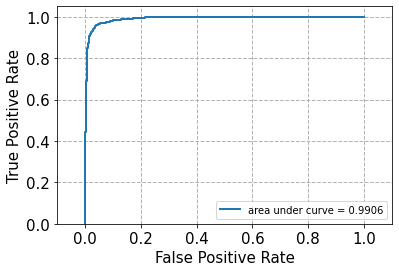

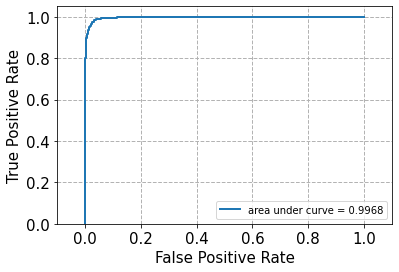

In [11]:
from sklearn import metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
###################################################################
## Soft Margin Predictor
# Determine metrics:
# *** Use the TEST binary class matrix as categories, either 1 or 0
s_accuracy = metrics.accuracy_score(test_data_class, soft_margin_svm_prediction)
s_precision = metrics.precision_score(test_data_class, soft_margin_svm_prediction)
s_recall = metrics.recall_score(test_data_class, soft_margin_svm_prediction)
s_f1 = 2 * (s_precision * s_recall) / (s_precision + s_recall)
print("############## Soft Margin Stats: ############### \n")
print("Accuracy: " + str(s_accuracy))
print("Precision: " + str(s_precision))
print("Recall: " + str(s_recall))
print("Confusion Matrix: \n" + str(metrics.confusion_matrix(test_data_class, soft_margin_svm_prediction)))
print("F1-score: "+ str(s_f1))

#print("Sanity Check: Raw output predictions (either 1 or 0): \n")
#print(soft_margin_svm_prediction.tolist())

# ROC Curve
dec_function_score = soft_margin_svm.decision_function(reduced_test_nmf_matrix)
fpr, tpr, thresholds = metrics.roc_curve(test_data_class, dec_function_score)
plot_roc(fpr,tpr)

print("\n\n" + '-'*40 + "\n\n")  

###################################################################
## Hard Margin Predictor
h_accuracy = metrics.accuracy_score(test_data_class, hard_margin_svm_prediction)
h_precision = metrics.precision_score(test_data_class, hard_margin_svm_prediction)
h_recall = metrics.recall_score(test_data_class, hard_margin_svm_prediction)
h_f1 = 2 * (h_precision * h_recall) / (h_precision + h_recall)
print("############## Hard Margin Stats: ############### \n")
print("Accuracy: " + str(h_accuracy))
print("Precision: " + str(h_precision))
print("Recall: " + str(h_recall))
print("Confusion Matrix: \n" + str(metrics.confusion_matrix(test_data_class, hard_margin_svm_prediction)))
print("F1-score: "+ str(h_f1))

# ROC Curve
dec_function_score = hard_margin_svm.decision_function(reduced_test_nmf_matrix)
fpr, tpr, thresholds = metrics.roc_curve(test_data_class, dec_function_score)
plot_roc(fpr,tpr)

print("\n\n" + '-'*40 + "\n\n")  

In [12]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
# from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


clf = LinearSVC().fit(reduced_train_nmf_matrix, training_data_class)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

nmf_settings3 = NMF(n_components=50, init='random', random_state=0)
trained_reduced_nfm = nmf_settings3.fit_transform(train_tfidf)


Hyperparameter values that will be tested: 
{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}


----------------------------------------




/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Settings of the Grid Seach: 
GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)
Data stored in grid_search: 
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


----------------------------------------




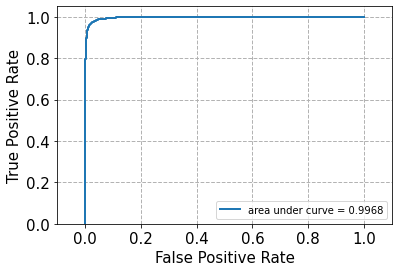

In [13]:
import math 
from sklearn.model_selection import GridSearchCV

# Create a Dictionary with key 'C' and value [10^-3  < k < 3]
hyper_param_range = {'C': [math.pow(10, k) for k in range(-3,4)]}
print("Hyperparameter values that will be tested: \n" + str(hyper_param_range))
print("\n\n" + '-'*40 + "\n\n")  
# Predict the outcomes of K-fold (5) cross validation tests
# Loop as many times as 'hyper_param_range' (7) and output best hyperparam value (average accuracy
# 35 tests in total = 5 (training different training set groups, k-folds = 5) * 7 (hyper_param settings per training set) = 35
# Use training_dataset, test data set will use the 'best' hyper_param
grid_search = GridSearchCV(clf, hyper_param_range, cv=5, scoring='accuracy')
grid_search.fit(reduced_train_nmf_matrix, training_data_class)
print("Settings of the Grid Seach: \n" + str(grid_search))
print("Data stored in grid_search: \n" + str(grid_search.cv_results_.keys()))
print("\n\n" + '-'*40 + "\n\n")  
# Print out tested parameter values (C=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]) vs mean vs std
grid_mean = grid_search.cv_results_['mean_test_score']
grid_std =  grid_search.cv_results_['std_test_score']
grid_params =  grid_search.cv_results_['params']
print("Average Accuracy vs. C-value: \n")
for mean, standard_dev, hyper_param_values in zip(grid_mean,grid_std,grid_params):
    print("Mean: " + str(mean) + "    std: " + str(standard_dev) + "   C: " + str(hyper_param_values))
print("\n\n" + '-'*40 + "\n\n")  

# Use best value C-value to run a prediction on test_dataset
optimal_svm = LinearSVC(loss='hinge',C=100).fit(reduced_train_nmf_matrix, training_data_class)
optimal_prediction = optimal_svm.predict(reduced_test_nmf_matrix)

# Plot stats for best prediction:
optimal_accuracy = metrics.accuracy_score(test_data_class, optimal_prediction)
optimal_precision = metrics.precision_score(test_data_class, optimal_prediction)
optimal_recall = metrics.recall_score(test_data_class, optimal_prediction)
optimal_f1 = 2 * (h_precision * h_recall) / (h_precision + h_recall)
print("############## Optimal C-value Stats = 100 ############### \n")
print("Accuracy: " + str(optimal_accuracy))
print("Precision: " + str(optimal_precision))
print("Recall: " + str(optimal_recall))
print("Confusion Matrix: \n" + str(metrics.confusion_matrix(test_data_class, optimal_prediction)))
print("F1-score: "+ str(optimal_f1))

# ROC Curve
dec_function_score = optimal_svm.decision_function(reduced_test_nmf_matrix)
fpr, tpr, thresholds = metrics.roc_curve(test_data_class, dec_function_score)
plot_roc(fpr,tpr)

## Problem 5